In [384]:
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)

In [385]:
from sklearn.feature_selection import RFE, f_regression

In [386]:
from sklearn.preprocessing import MinMaxScaler

In [387]:
from sklearn.ensemble import RandomForestRegressor

In [388]:
import numpy as np

In [389]:
import pandas as pd

In [390]:
data=pd.read_excel(r'D:/工作文档/项目文档/店铺分级/data/train_original.xlsx')

In [391]:
print(data)

      data_from  org_no        org_name district store_type  \
0    baishikang    1001      百氏康大药房(中心)      NaN        商业店   
1    baishikang    1011       百氏康仁厚堂大药房      NaN        院边店   
2    baishikang    1012       百氏康汉兴店大药房      NaN        社区店   
3    baishikang    1013       百氏康仪表厂大药房      NaN        商业店   
4    baishikang    1015        百氏康东郊大药房      NaN        院边店   
5    baishikang    1016     百氏康尉氏文化路大药房      NaN        乡镇店   
6    baishikang    1017        百氏康东苑大药房      NaN        商住店   
7    baishikang    1018       百氏康王周庄大药房      NaN        乡镇店   
8    baishikang    1019        百氏康东泰大药房      NaN        社区店   
9    baishikang    1020       百氏康苹果园大药房      NaN        社区店   
10   baishikang    1021        百氏康夷山大药房      NaN        商住店   
11   baishikang    1022       百氏康羊市桥大药房      NaN        社区店   
12   baishikang    1023       百氏康五一路大药房      NaN        商住店   
13   baishikang    1024        百氏康康太大药房      NaN        社区店   
14   baishikang    1025        百氏康杨寨大药房      NaN       

In [392]:
Y=data['total_payment']

In [393]:
print(Y)

0      5.529213e+06
1      6.439335e+05
2      8.664339e+05
3      6.108095e+05
4      6.616460e+05
5      6.009839e+05
6      4.088485e+05
7      4.275891e+05
8      3.844441e+05
9      6.459047e+05
10     5.764980e+05
11     4.050326e+05
12     5.212694e+05
13     3.967383e+05
14     1.475977e+05
15     6.163717e+05
16     5.048917e+05
17     4.816159e+05
18     3.478659e+05
19     8.916921e+05
20     3.296199e+05
21     3.457796e+05
22     2.716756e+05
23     5.387461e+05
24     9.315430e+05
25     1.029854e+06
26     3.597158e+05
27     4.146335e+05
28     5.410553e+05
29     3.087487e+05
           ...     
406    2.451163e+05
407    4.750672e+05
408    3.071574e+05
409    3.765992e+05
410    3.702023e+05
411    4.000005e+05
412    2.732062e+05
413    4.623918e+05
414    1.072548e+06
415    6.886803e+05
416    5.083006e+05
417    9.111506e+05
418    9.169901e+05
419    6.689913e+05
420    1.253931e+05
421    4.044759e+05
422    1.507715e+05
423    6.918809e+05
424    1.893686e+05


In [394]:
print(data.shape)

(436, 77)


In [395]:
x=pd.DataFrame(data.iloc[:,12:77])

In [396]:
print(x)

     low_profit_payment_ratio  low_profit_profit_ratio  \
0                    0.444390                 0.111556   
1                    0.182135                 0.089054   
2                    0.202132                 0.101286   
3                    0.191501                 0.091097   
4                    0.198266                 0.101946   
5                    0.208121                 0.115019   
6                    0.192096                 0.090412   
7                    0.217422                 0.102696   
8                    0.177203                 0.094656   
9                    0.239173                 0.110391   
10                   0.233470                 0.118840   
11                   0.224086                 0.110543   
12                   0.220796                 0.114701   
13                   0.225593                 0.118500   
14                   0.200346                 0.087763   
15                   0.209818                 0.096035   
16            

In [397]:
x1=pd.DataFrame(data.iloc[:,6])

In [398]:
print(x1)

     total_payment
0     5.529213e+06
1     6.439335e+05
2     8.664339e+05
3     6.108095e+05
4     6.616460e+05
5     6.009839e+05
6     4.088485e+05
7     4.275891e+05
8     3.844441e+05
9     6.459047e+05
10    5.764980e+05
11    4.050326e+05
12    5.212694e+05
13    3.967383e+05
14    1.475977e+05
15    6.163717e+05
16    5.048917e+05
17    4.816159e+05
18    3.478659e+05
19    8.916921e+05
20    3.296199e+05
21    3.457796e+05
22    2.716756e+05
23    5.387461e+05
24    9.315430e+05
25    1.029854e+06
26    3.597158e+05
27    4.146335e+05
28    5.410553e+05
29    3.087487e+05
..             ...
406   2.451163e+05
407   4.750672e+05
408   3.071574e+05
409   3.765992e+05
410   3.702023e+05
411   4.000005e+05
412   2.732062e+05
413   4.623918e+05
414   1.072548e+06
415   6.886803e+05
416   5.083006e+05
417   9.111506e+05
418   9.169901e+05
419   6.689913e+05
420   1.253931e+05
421   4.044759e+05
422   1.507715e+05
423   6.918809e+05
424   1.893686e+05
425   2.465846e+05
426   3.3588

In [399]:
print(x)

     low_profit_payment_ratio  low_profit_profit_ratio  \
0                    0.444390                 0.111556   
1                    0.182135                 0.089054   
2                    0.202132                 0.101286   
3                    0.191501                 0.091097   
4                    0.198266                 0.101946   
5                    0.208121                 0.115019   
6                    0.192096                 0.090412   
7                    0.217422                 0.102696   
8                    0.177203                 0.094656   
9                    0.239173                 0.110391   
10                   0.233470                 0.118840   
11                   0.224086                 0.110543   
12                   0.220796                 0.114701   
13                   0.225593                 0.118500   
14                   0.200346                 0.087763   
15                   0.209818                 0.096035   
16            

In [400]:
print(x.shape)

(436, 65)


In [401]:
from sklearn import preprocessing 

In [268]:
min_max_scaler = preprocessing.MinMaxScaler()  
X = min_max_scaler.fit_transform(x)  

In [402]:
names=data.iloc[:,12:77].columns.values.tolist()

In [403]:
ranks = {}

def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))


In [404]:
print(names)

['low_profit_payment_ratio', 'low_profit_profit_ratio', 'low_profit_goods_ratio', 'low_profit_bill_ratio', 'neg_profit_payment_ratio', 'neg_profit_profit_ratio', 'neg_profit_goods_ratio', 'neg_profit_bill_ratio', 'mid_profit_payment_ratio', 'mid_profit_profit_ratio', 'mid_profit_goods_ratio', 'mid_profit_bill_ratio', 'high_profit_payment_ratio', 'high_profit_profit_ratio', 'high_profit_goods_ratio', 'high_profit_bill_ratio', 'low_sale_payment_ratio', 'low_sale_profit_ratio', 'low_sale_goods_ratio', 'low_sale_bill_ratio', 'mid_sale_payment_ratio', 'mid_sale_profit_ratio', 'mid_sale_goods_ratio', 'mid_sale_bill_ratio', 'high_sale_payment_ratio', 'high_sale_profit_ratio', 'high_sale_goods_ratio', 'high_sale_bill_ratio', 'low_price_payment_ratio', 'low_price_profit_ratio', 'low_price_goods_ratio', 'low_price_bill_ratio', 'mid_price_payment_ratio', 'mid_price_profit_ratio', 'mid_price_goods_ratio', 'mid_price_bill_ratio', 'high_price_payment_ratio', 'high_price_profit_ratio', 'high_price_go

In [405]:
print(x.columns.values)

['low_profit_payment_ratio' 'low_profit_profit_ratio'
 'low_profit_goods_ratio' 'low_profit_bill_ratio'
 'neg_profit_payment_ratio' 'neg_profit_profit_ratio'
 'neg_profit_goods_ratio' 'neg_profit_bill_ratio'
 'mid_profit_payment_ratio' 'mid_profit_profit_ratio'
 'mid_profit_goods_ratio' 'mid_profit_bill_ratio'
 'high_profit_payment_ratio' 'high_profit_profit_ratio'
 'high_profit_goods_ratio' 'high_profit_bill_ratio'
 'low_sale_payment_ratio' 'low_sale_profit_ratio' 'low_sale_goods_ratio'
 'low_sale_bill_ratio' 'mid_sale_payment_ratio' 'mid_sale_profit_ratio'
 'mid_sale_goods_ratio' 'mid_sale_bill_ratio' 'high_sale_payment_ratio'
 'high_sale_profit_ratio' 'high_sale_goods_ratio' 'high_sale_bill_ratio'
 'low_price_payment_ratio' 'low_price_profit_ratio'
 'low_price_goods_ratio' 'low_price_bill_ratio' 'mid_price_payment_ratio'
 'mid_price_profit_ratio' 'mid_price_goods_ratio' 'mid_price_bill_ratio'
 'high_price_payment_ratio' 'high_price_profit_ratio'
 'high_price_goods_ratio' 'high_price

In [406]:
lr = LinearRegression(normalize=True)
lr.fit(x, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)

In [407]:
print(dict(zip(np.abs(lr.coef_), ranks )))

{2.0364669369301537e+19: 'Linear reg'}


In [408]:
print(ranks["Linear reg"])

{'low_profit_payment_ratio': 0.04, 'low_profit_profit_ratio': 0.39, 'low_profit_goods_ratio': 0.96, 'low_profit_bill_ratio': 0.0, 'neg_profit_payment_ratio': 0.04, 'neg_profit_profit_ratio': 0.39, 'neg_profit_goods_ratio': 0.96, 'neg_profit_bill_ratio': 0.0, 'mid_profit_payment_ratio': 0.04, 'mid_profit_profit_ratio': 0.39, 'mid_profit_goods_ratio': 0.96, 'mid_profit_bill_ratio': 0.0, 'high_profit_payment_ratio': 0.04, 'high_profit_profit_ratio': 0.39, 'high_profit_goods_ratio': 0.96, 'high_profit_bill_ratio': 0.0, 'low_sale_payment_ratio': 0.06, 'low_sale_profit_ratio': 0.17, 'low_sale_goods_ratio': 0.04, 'low_sale_bill_ratio': 0.0, 'mid_sale_payment_ratio': 0.06, 'mid_sale_profit_ratio': 0.17, 'mid_sale_goods_ratio': 0.04, 'mid_sale_bill_ratio': 0.0, 'high_sale_payment_ratio': 0.06, 'high_sale_profit_ratio': 0.17, 'high_sale_goods_ratio': 0.04, 'high_sale_bill_ratio': 0.0, 'low_price_payment_ratio': 0.02, 'low_price_profit_ratio': 0.22, 'low_price_goods_ratio': 1.0, 'low_price_bill_r

In [409]:
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in names:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Linear reg	Mean
low_profit_payment_ratio	0.04	0.04
low_profit_profit_ratio	0.39	0.39
low_profit_goods_ratio	0.96	0.96
low_profit_bill_ratio	0.0	0.0
neg_profit_payment_ratio	0.04	0.04
neg_profit_profit_ratio	0.39	0.39
neg_profit_goods_ratio	0.96	0.96
neg_profit_bill_ratio	0.0	0.0
mid_profit_payment_ratio	0.04	0.04
mid_profit_profit_ratio	0.39	0.39
mid_profit_goods_ratio	0.96	0.96
mid_profit_bill_ratio	0.0	0.0
high_profit_payment_ratio	0.04	0.04
high_profit_profit_ratio	0.39	0.39
high_profit_goods_ratio	0.96	0.96
high_profit_bill_ratio	0.0	0.0
low_sale_payment_ratio	0.06	0.06
low_sale_profit_ratio	0.17	0.17
low_sale_goods_ratio	0.04	0.04
low_sale_bill_ratio	0.0	0.0
mid_sale_payment_ratio	0.06	0.06
mid_sale_profit_ratio	0.17	0.17
mid_sale_goods_ratio	0.04	0.04
mid_sale_bill_ratio	0.0	0.0
high_sale_payment_ratio	0.06	0.06
high_sale_profit_ratio	0.17	0.17
high_sale_goods_ratio	0.04	0.04
high_sale_bill_ratio	0.0	0.0
low_price_payment_ratio	0.02	0.02
low_price_profit_ratio	0.22	0.22
low_pric

In [410]:
ridge = Ridge(alpha=7)
ridge.fit(x, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)

In [411]:
print(ranks["Ridge"])

{'low_profit_payment_ratio': 0.04, 'low_profit_profit_ratio': 0.05, 'low_profit_goods_ratio': 0.37, 'low_profit_bill_ratio': 0.14, 'neg_profit_payment_ratio': 0.01, 'neg_profit_profit_ratio': 0.0, 'neg_profit_goods_ratio': 0.03, 'neg_profit_bill_ratio': 0.24, 'mid_profit_payment_ratio': 0.29, 'mid_profit_profit_ratio': 0.2, 'mid_profit_goods_ratio': 0.17, 'mid_profit_bill_ratio': 0.06, 'high_profit_payment_ratio': 0.25, 'high_profit_profit_ratio': 0.31, 'high_profit_goods_ratio': 0.3, 'high_profit_bill_ratio': 0.12, 'low_sale_payment_ratio': 0.02, 'low_sale_profit_ratio': 0.03, 'low_sale_goods_ratio': 0.08, 'low_sale_bill_ratio': 0.1, 'mid_sale_payment_ratio': 0.12, 'mid_sale_profit_ratio': 0.13, 'mid_sale_goods_ratio': 0.2, 'mid_sale_bill_ratio': 0.02, 'high_sale_payment_ratio': 0.4, 'high_sale_profit_ratio': 0.46, 'high_sale_goods_ratio': 0.6, 'high_sale_bill_ratio': 0.1, 'low_price_payment_ratio': 0.17, 'low_price_profit_ratio': 0.01, 'low_price_goods_ratio': 0.32, 'low_price_bill_r

In [412]:
lasso = Lasso(alpha=.05)
lasso.fit(x, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [413]:
print(ranks["Lasso"] )

{'low_profit_payment_ratio': 0.03, 'low_profit_profit_ratio': 0.01, 'low_profit_goods_ratio': 0.09, 'low_profit_bill_ratio': 0.39, 'neg_profit_payment_ratio': 0.07, 'neg_profit_profit_ratio': 0.11, 'neg_profit_goods_ratio': 0.08, 'neg_profit_bill_ratio': 0.22, 'mid_profit_payment_ratio': 0.01, 'mid_profit_profit_ratio': 0.12, 'mid_profit_goods_ratio': 0.0, 'mid_profit_bill_ratio': 0.38, 'high_profit_payment_ratio': 0.16, 'high_profit_profit_ratio': 0.07, 'high_profit_goods_ratio': 0.07, 'high_profit_bill_ratio': 0.27, 'low_sale_payment_ratio': 0.17, 'low_sale_profit_ratio': 0.02, 'low_sale_goods_ratio': 0.21, 'low_sale_bill_ratio': 0.2, 'mid_sale_payment_ratio': 0.47, 'mid_sale_profit_ratio': 0.2, 'mid_sale_goods_ratio': 0.16, 'mid_sale_bill_ratio': 0.19, 'high_sale_payment_ratio': 0.46, 'high_sale_profit_ratio': 0.08, 'high_sale_goods_ratio': 0.02, 'high_sale_bill_ratio': 0.19, 'low_price_payment_ratio': 0.47, 'low_price_profit_ratio': 0.03, 'low_price_goods_ratio': 0.02, 'low_price_b

In [414]:
print(x)

     low_profit_payment_ratio  low_profit_profit_ratio  \
0                    0.444390                 0.111556   
1                    0.182135                 0.089054   
2                    0.202132                 0.101286   
3                    0.191501                 0.091097   
4                    0.198266                 0.101946   
5                    0.208121                 0.115019   
6                    0.192096                 0.090412   
7                    0.217422                 0.102696   
8                    0.177203                 0.094656   
9                    0.239173                 0.110391   
10                   0.233470                 0.118840   
11                   0.224086                 0.110543   
12                   0.220796                 0.114701   
13                   0.225593                 0.118500   
14                   0.200346                 0.087763   
15                   0.209818                 0.096035   
16            

In [415]:
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


In [416]:
print(ranks["Stability"])

{'low_profit_payment_ratio': 1.0, 'low_profit_profit_ratio': 1.0, 'low_profit_goods_ratio': 0.79, 'low_profit_bill_ratio': 0.62, 'neg_profit_payment_ratio': 0.89, 'neg_profit_profit_ratio': 1.0, 'neg_profit_goods_ratio': 0.98, 'neg_profit_bill_ratio': 0.99, 'mid_profit_payment_ratio': 0.95, 'mid_profit_profit_ratio': 1.0, 'mid_profit_goods_ratio': 0.9, 'mid_profit_bill_ratio': 0.95, 'high_profit_payment_ratio': 0.52, 'high_profit_profit_ratio': 1.0, 'high_profit_goods_ratio': 0.62, 'high_profit_bill_ratio': 0.79, 'low_sale_payment_ratio': 0.99, 'low_sale_profit_ratio': 1.0, 'low_sale_goods_ratio': 0.97, 'low_sale_bill_ratio': 0.87, 'mid_sale_payment_ratio': 1.0, 'mid_sale_profit_ratio': 1.0, 'mid_sale_goods_ratio': 0.93, 'mid_sale_bill_ratio': 0.93, 'high_sale_payment_ratio': 0.98, 'high_sale_profit_ratio': 1.0, 'high_sale_goods_ratio': 0.07, 'high_sale_bill_ratio': 0.33, 'low_price_payment_ratio': 0.0, 'low_price_profit_ratio': 1.0, 'low_price_goods_ratio': 0.55, 'low_price_bill_ratio

In [417]:
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(rfe.ranking_, names, order=-1)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [418]:
print(ranks["RFE"])

{'low_profit_payment_ratio': 0.58, 'low_profit_profit_ratio': 0.55, 'low_profit_goods_ratio': 0.65, 'low_profit_bill_ratio': 0.85, 'neg_profit_payment_ratio': 1.0, 'neg_profit_profit_ratio': 0.5, 'neg_profit_goods_ratio': 0.6, 'neg_profit_bill_ratio': 0.81, 'mid_profit_payment_ratio': 0.97, 'mid_profit_profit_ratio': 0.08, 'mid_profit_goods_ratio': 0.61, 'mid_profit_bill_ratio': 0.9, 'high_profit_payment_ratio': 1.0, 'high_profit_profit_ratio': 0.23, 'high_profit_goods_ratio': 0.63, 'high_profit_bill_ratio': 0.89, 'low_sale_payment_ratio': 1.0, 'low_sale_profit_ratio': 0.26, 'low_sale_goods_ratio': 0.69, 'low_sale_bill_ratio': 0.79, 'mid_sale_payment_ratio': 0.92, 'mid_sale_profit_ratio': 0.15, 'mid_sale_goods_ratio': 0.66, 'mid_sale_bill_ratio': 0.76, 'high_sale_payment_ratio': 0.94, 'high_sale_profit_ratio': 0.4, 'high_sale_goods_ratio': 0.73, 'high_sale_bill_ratio': 0.77, 'low_price_payment_ratio': 0.95, 'low_price_profit_ratio': 0.37, 'low_price_goods_ratio': 0.74, 'low_price_bill_

In [419]:
rf = RandomForestRegressor()
rf.fit(x,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)

In [420]:
print(ranks["RF"])

{'low_profit_payment_ratio': 0.0, 'low_profit_profit_ratio': 0.01, 'low_profit_goods_ratio': 0.3, 'low_profit_bill_ratio': 0.01, 'neg_profit_payment_ratio': 0.0, 'neg_profit_profit_ratio': 0.01, 'neg_profit_goods_ratio': 0.0, 'neg_profit_bill_ratio': 0.0, 'mid_profit_payment_ratio': 0.03, 'mid_profit_profit_ratio': 0.44, 'mid_profit_goods_ratio': 0.0, 'mid_profit_bill_ratio': 0.01, 'high_profit_payment_ratio': 0.0, 'high_profit_profit_ratio': 0.0, 'high_profit_goods_ratio': 0.08, 'high_profit_bill_ratio': 0.0, 'low_sale_payment_ratio': 0.14, 'low_sale_profit_ratio': 0.02, 'low_sale_goods_ratio': 0.07, 'low_sale_bill_ratio': 0.0, 'mid_sale_payment_ratio': 0.05, 'mid_sale_profit_ratio': 0.01, 'mid_sale_goods_ratio': 0.02, 'mid_sale_bill_ratio': 0.0, 'high_sale_payment_ratio': 0.0, 'high_sale_profit_ratio': 0.03, 'high_sale_goods_ratio': 0.0, 'high_sale_bill_ratio': 0.01, 'low_price_payment_ratio': 0.03, 'low_price_profit_ratio': 0.01, 'low_price_goods_ratio': 0.13, 'low_price_bill_ratio'

In [421]:
f, pval  = f_regression(x, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)


In [422]:
print(ranks["Corr."])

{'low_profit_payment_ratio': 0.02, 'low_profit_profit_ratio': 0.13, 'low_profit_goods_ratio': 0.27, 'low_profit_bill_ratio': 0.05, 'neg_profit_payment_ratio': 0.0, 'neg_profit_profit_ratio': 0.0, 'neg_profit_goods_ratio': 0.05, 'neg_profit_bill_ratio': 0.0, 'mid_profit_payment_ratio': 0.23, 'mid_profit_profit_ratio': 0.17, 'mid_profit_goods_ratio': 0.1, 'mid_profit_bill_ratio': 0.11, 'high_profit_payment_ratio': 0.01, 'high_profit_profit_ratio': 0.0, 'high_profit_goods_ratio': 0.15, 'high_profit_bill_ratio': 0.02, 'low_sale_payment_ratio': 0.01, 'low_sale_profit_ratio': 0.01, 'low_sale_goods_ratio': 0.15, 'low_sale_bill_ratio': 0.01, 'mid_sale_payment_ratio': 0.06, 'mid_sale_profit_ratio': 0.15, 'mid_sale_goods_ratio': 0.3, 'mid_sale_bill_ratio': 0.04, 'high_sale_payment_ratio': 0.15, 'high_sale_profit_ratio': 0.21, 'high_sale_goods_ratio': 0.24, 'high_sale_bill_ratio': 0.07, 'low_price_payment_ratio': 0.14, 'low_price_profit_ratio': 0.04, 'low_price_goods_ratio': 0.19, 'low_price_bill

In [423]:
def featureSet(data):
    XList = []
    data_num = len(data)
    for row in range(0, data_num):
        tmp_list = []
        tmp_list.append(data.iloc[row]['total_bill_number'])
        tmp_list.append(data.iloc[row]['sales_area'])
        tmp_list.append(data.iloc[row]['low_profit_goods_ratio'])
        tmp_list.append(data.iloc[row]['neg_profit_bill_ratio'])
        tmp_list.append(data.iloc[row]['mid_profit_payment_ratio'])
        tmp_list.append(data.iloc[row]['high_profit_profit_ratio'])
        tmp_list.append(data.iloc[row]['low_sale_bill_ratio'])
        tmp_list.append(data.iloc[row]['mid_sale_goods_ratio'])
        tmp_list.append(data.iloc[row]['high_sale_goods_ratio'])
        tmp_list.append(data.iloc[row]['low_price_goods_ratio'])
        tmp_list.append(data.iloc[row]['mid_price_goods_ratio'])
        tmp_list.append(data.iloc[row]['high_price_profit_ratio'])
        tmp_list.append(data.iloc[row]['modern_medicine_user_ratio'])
        tmp_list.append(data.iloc[row]['traditional_medicine_user_ratio'])
        tmp_list.append(data.iloc[row]['normal_persuade_user_ratio'])
        tmp_list.append(data.iloc[row]['vital_value_user_ratio'])
        tmp_list.append(data.iloc[row]['import_bill_number_ratio'])
        tmp_list.append(data.iloc[row]['original_payment_ratio'])
        tmp_list.append(data.iloc[row]['otc_profit_ratio'])
        XList.append(tmp_list)
    return XList

In [424]:
x_train=featureSet(data)

In [425]:
print(x_train)

[[45345, 600.0, 0.0531981629629158, 0.02928658065938913, 0.1522553501004391, 0.2568145977209858, 0.08258903958540081, 0.03570712588742101, 0.4594751105925886, 0.02165391497012844, 0.506880509186667, 0.1645792296141376, 0.735534686458649, 0.2183580733111178, 0.4051499545592245, 0.2631929718267192, 0.1770905198049245, 0.476695258872662, 0.3842888023655144], [11513, 400.0, 0.05095816374606429, 0.03013984191783202, 0.2427449577522902, 0.3310043448732657, 0.08234170068618084, 0.04936831552883208, 0.4677267038461457, 0.03392644772699441, 0.5024044897645737, 0.1542504546003453, 0.7878345498783454, 0.1827250608272506, 0.2961070559610706, 0.3537712895377129, 0.09215808725131591, 0.1547665877709219, 0.4455822425336184], [17574, 173.0, 0.1817283797794018, 0.01695686810060316, 0.2475757143023112, 0.2511042073072675, 0.09479913508592239, 0.04195453288753015, 0.4682832444190846, 0.1733084020490984, 0.3926873348070102, 0.1852951010990132, 0.7528925619834711, 0.2233471074380165, 0.381198347107438, 0.2

In [426]:
import xgboost as xgb

In [427]:
from xgboost import XGBRegressor

In [428]:
model = xgb.XGBRegressor(max_depth=6, learning_rate=0.05, n_estimators=500, silent=False, objective='reg:gamma')

In [429]:
model.fit(x_train, Y)

[16:07:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[16:07:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:07:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:07:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:07:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:07:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[16:07:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 

[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[16:07:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:gamma', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

In [430]:
data_test=pd.read_excel(r'D:/工作文档/项目文档/店铺分级/data/test_original.xlsx')

In [431]:
x_test=featureSet(data_test)

In [432]:
prediction=model.predict(x_test)

In [433]:
print(prediction)

[ 5343932.      597808.3     791330.1     618207.5     667050.9
   506658.97    427634.62    477407.7     300579.7     589056.75
   480324.06    436039.      498131.78    368291.28    166243.02
   574677.5     507441.38    469582.34    353237.75    813823.6
   316340.25    369613.56    229980.3     538860.6     943519.1
   975015.7     223184.05    366386.94    368325.7     489101.16
   359934.84    285715.47    193903.08    468894.97    236316.36
   290595.94    128048.24    623226.1     395470.97    544933.94
   259530.88    139954.08    149901.56    215843.84    328337.56
   231788.9      99626.92    533287.1     385064.44    362224.1
   198351.86    164721.36    295132.2     376139.4     262007.8
   239633.88    358351.1     142652.64   3524149.    16416292.
  7112394.     2044173.8    5333037.     1181133.5     567366.2
  5020408.5    2897609.     1952026.9    1259076.2    3217998.2
  2783209.      318586.1     743001.7     554998.56    780840.9
  1061515.2     830259.6     981211

In [434]:
target=data_test['total_payment']

In [435]:
error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])


In [436]:
print("Errors: ", error)
print(error)


Errors:  [352146.02319919784, -17140.064300007652, -20514.699999987613, -5462.896700007608, -2239.877799998503, 128384.76526999462, -62577.421000010916, -42226.22150001238, 48253.31979999237, -40555.49930001225, 41963.5379999819, -55978.04940001009, -10461.849350015924, -23630.87005000899, -8258.108525000192, 130.29949998331722, -5891.885000017472, -28164.82915001613, -50114.16500000609, -5515.692099990207, -1680.9816500063753, -30854.073000010278, 16146.687024996994, -10110.761300018174, -56879.34559998801, 56941.62950002495, -4881.232775004086, -77512.7327000061, 6399.356099988916, 25468.013349988614, -65247.13535000401, -11252.466150002612, 19666.823074999003, -19811.364750015025, -22859.93537500099, -64750.125100002595, -922.2341874994017, -42474.35700001719, 75075.8472499869, -30722.91950001719, -29717.02370000229, 29714.746874999488, 244.989700000413, -9802.043950000807, -19174.796700006875, 8767.20574999851, -35472.59187499979, -15099.023000019195, -49439.836400010274, 16561.688

In [437]:
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值

In [438]:
print("Square Error: ", squaredError)


Square Error:  [124006821655.00998, 293781804.2083968, 420852916.0894918, 29843240.354954015, 5017052.558926134, 16482647953.431616, 3915933619.012607, 1783053782.168108, 2328382871.720336, 1644748523.473294, 1760938521.4759247, 3133542014.6299696, 109450291.82242861, 558418019.3204119, 68196356.41068086, 16977.959695902486, 34714308.85343088, 793257601.0495982, 2511429533.6478353, 30422859.341894377, 2825699.307658156, 951973820.6899632, 260715501.88320628, 102227494.0659452, 3235259955.8828754, 3242349170.118112, 23826433.40377409, 6008223730.622596, 40951758.49446535, 648619703.9951982, 4257188671.3817434, 126617994.45695461, 386783929.86331326, 392490173.25813794, 522576645.34922165, 4192578700.4659863, 850515.8965926816, 1804071002.5649092, 5636382840.303365, 943897782.6045364, 883101497.5864978, 882966181.8452919, 60019.953106292356, 96080065.59774742, 367672828.48659456, 76863896.66280693, 1258304774.3303008, 227980495.55510867, 2444297423.259781, 274289524.3144899, 701504137.02

In [439]:

print("Absolute Value of Error: ", absError)

Absolute Value of Error:  [352146.02319919784, 17140.064300007652, 20514.699999987613, 5462.896700007608, 2239.877799998503, 128384.76526999462, 62577.421000010916, 42226.22150001238, 48253.31979999237, 40555.49930001225, 41963.5379999819, 55978.04940001009, 10461.849350015924, 23630.87005000899, 8258.108525000192, 130.29949998331722, 5891.885000017472, 28164.82915001613, 50114.16500000609, 5515.692099990207, 1680.9816500063753, 30854.073000010278, 16146.687024996994, 10110.761300018174, 56879.34559998801, 56941.62950002495, 4881.232775004086, 77512.7327000061, 6399.356099988916, 25468.013349988614, 65247.13535000401, 11252.466150002612, 19666.823074999003, 19811.364750015025, 22859.93537500099, 64750.125100002595, 922.2341874994017, 42474.35700001719, 75075.8472499869, 30722.91950001719, 29717.02370000229, 29714.746874999488, 244.989700000413, 9802.043950000807, 19174.796700006875, 8767.20574999851, 35472.59187499979, 15099.023000019195, 49439.836400010274, 16561.688449988724, 26485.9

In [440]:

print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE

MSE =  153153252368.69534


In [441]:
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE


RMSE =  391347.9939500078
MAE =  78389.49874995044


In [442]:
import lightgbm as lgb

In [443]:
model2=lgb.LGBMRegressor(boosting_type='gbdt', num_leaves=63, max_depth=-1, learning_rate=0.1, n_estimators=100, max_bin=63, subsample_for_bin=50000, objective='regression', min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=1, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True)

In [444]:
model2.fit(x_train, Y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_bin=63, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=63, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=50000, subsample_freq=1)

In [445]:
predictions2=model2.predict(x_test)

In [446]:
print(predictions2)

[5254713.73032415 1345988.34609016  590807.71916083  768688.51823246
  910030.30153963  866402.97162069  235388.33135673  454804.82245735
  213962.72488019  336544.75198758 -227939.18830015  437136.67848673
  881894.51287467  338078.63190656   93176.0364024   373855.15918577
  441896.42012778  306392.69125482  308492.13000264  863009.5918606
  271053.22132609  331408.55044152  580810.49661611  530451.05040337
  926310.8258382   868934.13757697  180177.40843617  407218.1992916
  534454.71790959 1482097.19664051  349519.56068338  202054.04050923
  651764.86896314  435303.14618512  266011.90054471  129929.76835233
  140742.66975563 -259472.60244166  577675.82576719  307906.7484991
  167052.76956753  105422.05926832  172203.28410871   20600.85863846
  273633.56867866  179678.12353032   95442.23984603  586000.09972445
 -438320.34118229  247262.05942973  121745.10885831  102616.06085496
  349060.4543453   401921.16127961  713536.07337455  696155.93928237
  263618.51804186  247939.47339376 35

In [447]:
target2=data_test['total_payment']

In [448]:
error = []
for i in range(len(target2)):
    error.append(target2[i] - predictions2[i])

In [449]:
print("Errors: ", error)
print(error)
 
 
 
 
 
 
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#target-prediction之差平方 
    absError.append(abs(val))#误差绝对值
 
 
print("Square Error: ", squaredError)
print("Absolute Value of Error: ", absError)
 
 
 
 
print("MSE = ", sum(squaredError) / len(squaredError))#均方误差MSE
 
 
 
 
from math import sqrt
print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#均方根误差RMSE
print("MAE = ", sum(absError) / len(absError))#平均绝对误差MAE


Errors:  [441364.2928750431, -765320.0978901698, 180007.70583918027, -155943.91493247251, -245219.30433962808, -231359.23760069965, 129668.87264326369, -19623.356457366433, 134870.28241980128, 211956.49871241167, 750226.7888001363, -57075.72788674384, -394224.5809746845, 6581.779293430329, 64808.870697596896, 200952.64031421032, 59653.0698722027, 135024.82334516, -5368.545002642204, -54701.6589605863, 43606.047023908235, 7350.939058471296, -334683.512716111, -1701.186703391606, -39671.04643818375, 163023.17942305095, 38125.40566382147, -118343.99449160392, -159729.6743095992, -967528.0270405194, -54831.852283385175, 72408.96209076387, -438194.96776314476, 13780.457814864756, -52555.47654471197, 95916.04404766866, -13616.661755631227, 840224.3704416427, -107129.00976720563, 206304.2695008841, 62761.08173246923, 64246.76573168034, -22056.73190870497, 185440.94116154415, 35529.1971213338, 60877.98846968199, -31287.909846030067, -67811.99772447202, 773944.942282283, 131523.7227702561, 5012

In [450]:
import operator

In [451]:

import matplotlib.pyplot as plt

In [452]:
  params = {
        'min_child_weight': 100,
        'eta': 0.02,
        'colsample_bytree': 0.7,
        'max_depth': 12,
        'subsample': 0.7,
        'alpha': 1,
        'gamma': 1,
        'silent': 1,
        'verbose_eval': True,
        'seed': 12
    }
    

In [471]:
rounds=50

In [472]:
xgtrain = xgb.DMatrix(x, label=Y)

In [473]:
 bst = xgb.train(params, xgtrain, num_boost_round=rounds)

In [474]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()


In [475]:
ceate_feature_map(x)

In [476]:
importance = bst.get_fscore(fmap='xgb.fmap')

In [477]:

importance = sorted(importance.items(), key=operator.itemgetter(1))
 


In [478]:
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()
df.to_csv("xgboost_store_feat_importance_no_bill_number3.csv", index=False)


<Figure size 432x288 with 0 Axes>

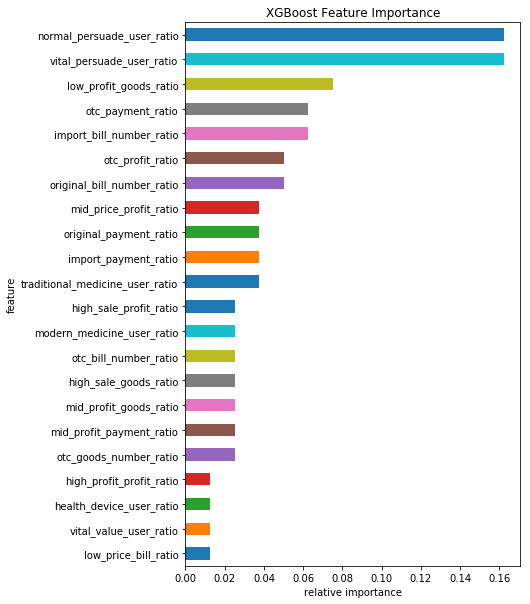

In [479]:
plt.figure()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()